# Constractive autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

In [3]:
images = lambda i:i.reshape(8,8)

In [4]:
data = torch.tensor(digits.data,dtype=torch.float32)

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net,self).__init__()
        self.enc = self.encoder(8,4)
        self.enc1 = self.encoder(4,2)
        self.dec1 = self.decoder(2,4)
        self.dec = self.decoder(4,8)
    
    def encoder(self,inp,out):
        return nn.Linear(inp,out)
    
    def decoder(self,inp,out):
        return nn.Linear(inp,out)
    
    def forward(self,x):
        
        out = self.enc(x)
        out = self.enc1(out)
        out = self.dec1(out)
        out = self.dec(out)
        
        return out

In [6]:
model = Net()
print(model)

Net(
  (enc): Linear(in_features=8, out_features=4, bias=True)
  (enc1): Linear(in_features=4, out_features=2, bias=True)
  (dec1): Linear(in_features=2, out_features=4, bias=True)
  (dec): Linear(in_features=4, out_features=8, bias=True)
)


In [7]:
# extend the L2 loss function 

class ConstractiveLoss(nn.L1Loss):
    def __init__(self):
        
        super(ConstractiveLoss,self).__init__()
        
        
    def forward(self,inputs,output):

        jacobian = torch.autograd.functional.jacobian(model,inputs)
        norm = torch.norm(jacobian,'fro')
        la = 0.0005
        
        sub = (inputs - output) 
        lanorm = la*norm
        
        J = torch.sum(sub+lanorm)
        return J
        
        

In [8]:
creatrion = ConstractiveLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [9]:
load_data = torch.utils.data.DataLoader(data,batch_size = 32)

In [10]:
print(load_data)

In [11]:
# training

from tqdm.notebook import tqdm 

cons_loss = []


for i in range(100):
       
    image = next(iter(load_data)).reshape(32,8,8)
    
    output = model(image)
    
    loss = creatrion(image,output)
    
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
   # if i%100 == 0:
    cons_loss.append(loss.item())
    #print(loss.item())
    print(loss.item())


9538.6748046875
9536.1376953125
9533.5986328125
9531.05859375
9528.5185546875
9525.9765625
9523.43359375
9520.890625
9518.3447265625
9515.798828125
9513.2509765625
9510.7021484375
9508.1513671875
9505.5986328125
9503.0458984375
9500.4921875
9497.935546875
9495.3779296875
9492.818359375
9490.2568359375
9487.6953125
9485.130859375
9482.5654296875
9479.9990234375
9477.427734375
9474.8564453125
9472.2822265625
9469.7060546875
9467.1279296875
9464.5478515625
9461.9638671875
9459.37890625
9456.791015625
9454.19921875
9451.6044921875
9449.0087890625
9446.4091796875
9443.8056640625
9441.2001953125
9438.58984375
9435.9755859375
9433.357421875
9430.73828125
9428.1123046875
9425.4833984375
9422.8505859375
9420.2109375
9417.568359375
9414.9208984375
9412.2685546875
9409.611328125
9406.9482421875
9404.279296875
9401.603515625
9398.923828125
9396.2373046875
9393.5439453125
9390.8447265625
9388.138671875
9385.427734375
9382.708984375
9379.982421875
9377.2490234375
9374.5087890625
9371.7607421875
9369

In [24]:
%matplotlib inline

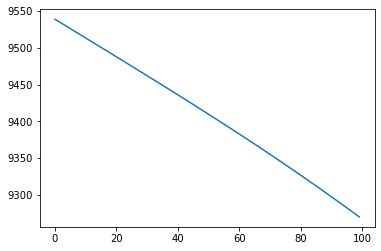

In [12]:
plt.plot(cons_loss)

Text(0.5, 1.0, 'Representation Space')

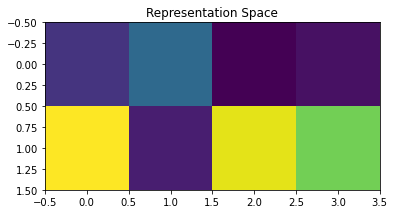

In [26]:
# the representation space output

params = [i for i in model.parameters()]

fig,ax = plt.subplots(1,1)

ax.imshow(params[2].detach().numpy())
ax.set_title("Representation Space")
#print(params)

Text(0.5, 1.0, 'reconstracted image')

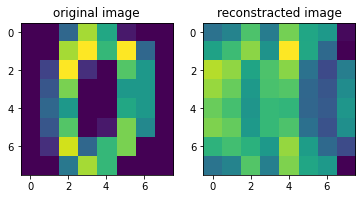

In [27]:
test_image = data[0].reshape(8,8)
output_from_model = model(test_image)

fix,ax = plt.subplots(1,2)

ax[0].imshow(test_image.detach().numpy())
ax[1].imshow(output_from_model.detach().numpy())

ax[0].set_title("original image")
ax[1].set_title("reconstracted image") # training is slow 